In [5]:
import numpy as np
import seaborn as sns
import pandas as pd

In [43]:
# KNN implementation from scratch - for binary classification
class KNNClassifier:
    def __init__(self,k=3):
        self.k = k
        
    def _euclidean_dist(self,x1,x2):
        return np.sqrt(np.sum((x1 - x2) **2))
        
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
        
    def predict_one(self,x):
        distances = [self._euclidean_dist(x,x_train) for x_train in self.X_train]
        knn_indices = np.argsort(distances)[:self.k]
        knn_classes = [self.y_train[i] for i in knn_indices]
        majortiy_class = np.argmax(np.bincount(knn_classes))
        return majortiy_class
        
    def predict(self,x):
        y_pred = [self.predict_one(x) for x in x]
        return np.array(y_pred)

In [44]:
x1 = np.array([1,2])
x2 = np.array([3,4])

np.sqrt(np.sum((x1 - x2) **2))

np.float64(2.8284271247461903)

In [45]:
# Data
X_train = np.array([
    [1,2],
    [2,3],
    [3,3],
    [6,5],
    [7,7]
])

y_train = np.array([0,0,0,1,1])

X_test = np.array([
    [2,2],
    [6,6]
])

model = KNNClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

[0 1]


<Axes: xlabel='x1', ylabel='x2'>

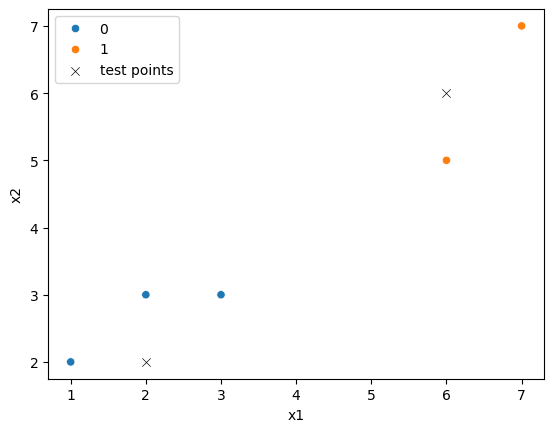

In [12]:
# Visualize
X_train_df = pd.DataFrame(X_train,columns=["x1","x2"])
X_train_df["labels"] = y_train

sns.scatterplot(
    data = X_train_df,
    x = "x1",
    y = "x2",
    hue="labels"
)

X_test_df = pd.DataFrame(X_test,columns=["x1","x2"])
sns.scatterplot(
    data = X_test_df,
    x = "x1",
    y = "x2",
    color="black",
    label="test points",
    
)

In [9]:
X_train_df

,x1,x2,labels
0,1,2,0
1,2,3,0
2,3,3,0
3,6,5,1
4,7,7,1
